In [ ]:
import re
import csv
import pandas as pd
import numpy as np
import gensim
import pyLDAvis.gensim_models
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel, LsiModel, LdaModel, HdpModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
def word_tokenize(sentence):
  acronym_each_dot = r"(?:[a-zğçşöüı]\.){2,}"
  acronym_end_dot = r"\b[a-zğçşöüı]{2,3}\."
  suffixes = r"[a-zğçşöüı]{3,}' ?[a-zğçşöüı]{0,3}"
  numbers = r"\d+[.,:\d]+"
  any_word = r"[a-zğçşöüı]+"
  punctuations = r"[a-zğçşöüı]*[.,!?;:]"
  word_regex = "|".join([acronym_each_dot,acronym_end_dot,suffixes,numbers,any_word,punctuations])
  sentence = re.compile("%s"%word_regex, re.I).findall(sentence)
  return sentence

In [ ]:
file = open('../allPoetry.txt', encoding="utf8")

In [ ]:
allPoems=pd.read_csv("../allPoetry.txt",sep= " \t" ,error_bad_lines=False, engine = 'python',encoding = "utf-8")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df=pd.DataFrame()
df["allpoems"]=allPoems

In [ ]:
df['tokenized_texts'] = df['allpoems'].apply(word_tokenize) 

In [ ]:
tokenized = df['tokenized_texts']
dictionary = corpora.Dictionary(tokenized)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized]

In [ ]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('adem', 1),
  ('ademe', 1),
  ('ademoğlu', 1),
  ('ah', 1),
  ('aksimi', 1),
  ('almadın', 2),
  ('alıcı', 1),
  ('aralık', 1),
  ('arastadan', 1),
  ('arınaydık', 1),
  ('avcumda', 1),
  ('açmadan', 1),
  ('ağsa', 1),
  ('aşk', 1),
  ('aşkın', 1),
  ('baktık', 1),
  ('bayındırladı', 1),
  ('bağışık', 1),
  ('bedenim', 1),
  ('beklemeliydi', 1),
  ('ben', 1),
  ('bendim', 1),
  ('benianladım', 1),
  ('beride', 1),
  ('berrak', 1),
  ('bileyim', 1),
  ('bilmeden', 1),
  ('bilmedim', 2),
  ('binlerce', 1),
  ('birbirimize', 1),
  ('bozar', 1),
  ('buladık', 1),
  ('bulagelmiş', 1),
  ('buldum', 1),
  ('buluta', 1),
  ('bulutu', 1),
  ('bunca', 1),
  ('burda', 1),
  ('büklümlerinin', 1),
  ('büyük', 1),
  ('canımı', 2),
  ('cevher', 1),
  ('cüret', 1),
  ('dalların', 1),
  ('dalmaksızın', 1),
  ('dargınlık', 1),
  ('dedirtme', 1),
  ('demedim', 1),
  ('demek', 1),
  ('demişim', 1),
  ('dert', 1),
  ('devam', 1),
  ('deyip', 1),
  ('dilimin', 1),
  ('diyar', 1),
  ('diyorduk', 1),
  ('d

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=dictionary, passes=15)
ldamodel.save('mOdel.gensim')
topics = ldamodel.print_topics(num_words=30) 

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * l

In [ ]:
for topic in topics:
  print(topic)

(0, '0.003*"zaman" + 0.002*"insan" + 0.002*"şivekar" + 0.001*"iki" + 0.001*"yusuf" + 0.001*"kucak" + 0.001*"gün" + 0.001*"uzun" + 0.001*"içinde" + 0.001*"güzel" + 0.001*"sabah" + 0.001*"hayat" + 0.001*"aşk" + 0.001*"çocuklar" + 0.001*"gidip" + 0.001*"hüsnü" + 0.001*"uzak" + 0.001*"kuş" + 0.001*"yaz" + 0.001*"çocuksun" + 0.001*"gece" + 0.001*"çocuk" + 0.001*"yer" + 0.001*"insanlar" + 0.001*"su" + 0.001*"deniz" + 0.001*"gelir" + 0.001*"arasında" + 0.001*"orda" + 0.001*"kar"')
(1, '0.002*"zaman" + 0.002*"kar" + 0.001*"uzun" + 0.001*"üç" + 0.001*"gün" + 0.001*"savaş" + 0.001*"vardır" + 0.001*"rengi" + 0.001*"su" + 0.001*"iki" + 0.001*"insan" + 0.001*"ölüm" + 0.001*"güneş" + 0.001*"dünya" + 0.001*"karanlık" + 0.001*"içinde" + 0.001*"miydi" + 0.001*"söz" + 0.001*"varsa" + 0.001*"göz" + 0.001*"hüzün" + 0.001*"avcılar" + 0.001*"karda" + 0.001*"kan" + 0.001*"kaçmak" + 0.001*"kaldı" + 0.001*"güzel" + 0.001*"boş" + 0.001*"bırakıyorum" + 0.001*"insanlar"')
(2, '0.003*"zaman" + 0.002*"yere" + 0.002

In [ ]:
get_document_topics = ldamodel.get_document_topics(corpus[0])
print(get_document_topics)

[(3, 0.99708086)]


In [ ]:
lda_viz = gensim.models.ldamodel.LdaModel.load('mOdel.gensim')#load lda model
lda_display = pyLDAvis.gensim_models.prepare(lda_viz, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas

In [ ]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=df['tokenized_texts'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [ ]:
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.35462271967405307


In [ ]:
coherence_ldas = coherence_model_lda.get_coherence_per_topic()

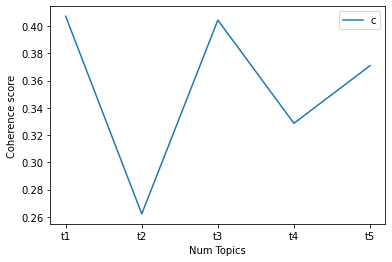

In [ ]:
topicsname=[]
for i in range(1,5+1):
    topicsname.append("t{0}".format(i))
topicsname

plt.plot(topicsname,coherence_ldas)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**LSA**

In [ ]:
LSI_Model = LsiModel(corpus = corpus, num_topics = 5, id2word = dictionary)
LSI_Model.show_topics(num_topics = 5)

[(0,
  '-0.190*"gün" + -0.183*"can" + -0.144*"kara" + -0.129*"kar" + -0.127*"kan" + -0.123*"üç" + -0.123*"güzel" + -0.119*"iki" + -0.117*"dağ" + -0.105*"gece"'),
 (1,
  '0.143*"şivekar" + 0.139*"zaman" + 0.124*"yusuf" + 0.111*"yağmur" + 0.105*"insan" + 0.104*"yaktım" + 0.091*"hüsnü" + 0.090*"yüreğim" + 0.087*"dünya" + 0.086*"son"'),
 (2,
  '-0.258*"şivekar" + -0.223*"yusuf" + -0.176*"insan" + -0.164*"hüsnü" + -0.130*"iki" + -0.117*"yusufu" + -0.117*"haz" + -0.114*"güzel" + -0.108*"insanlar" + 0.107*"yağmur"'),
 (3,
  '-0.234*"savaş" + -0.127*"üç" + 0.116*"şivekar" + -0.108*"göz" + -0.108*"boş" + -0.105*"ölüm" + 0.100*"yusuf" + -0.088*"aklı" + -0.080*"dinç" + -0.080*"savaşın"'),
 (4,
  '0.425*"kucak" + 0.226*"dön" + 0.214*"iniyorum" + 0.166*"şarkıya" + 0.142*"başa" + 0.118*"değilim" + 0.101*"şehrin" + 0.095*"eve" + 0.078*"yerde" + 0.078*"zaman"')]

In [ ]:
LSI_Model = gensim.models.lsimodel.LsiModel(corpus, num_topics = 5, id2word=dictionary)
LSI_Model.save('mOdel1.gensim')

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
lsa_viz = gensim.models.lsimodel.LsiModel.load('mOdel1.gensim')#load lsa model
lsa_display = pyLDAvis.gensim_models.prepare(lsa_viz, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lsa_display)

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


AttributeError: ignored